In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal
from numba import njit

from IPython.display import Latex

In [2]:
%matplotlib inline

In [7]:
np.random.seed(1234)

In [30]:
N = 1000
ρ = 0.5

In [46]:
def data_generate(N, ρ):
    
    mean = [0., 0.]
    cov = [[1, ρ], [ρ, 1]]
    rvs = multivariate_normal(mean=mean, cov=cov).rvs(N)
    x_star = rvs[:, 0]
    z = rvs[:, 1]
    
    u = np.random.normal(size=N)
    v = np.random.normal(size=N)
    v2 = np.random.normal(size=N)
    
    y = 1 + x_star + z + u
    x = x_star + v
    x2 = x_star + v2

    return y, x, z, x2

In [47]:
y, x, z, x2 = data_generate(N, ρ)

In [48]:
np.cov(x, z)

array([[1.9712582 , 0.4519142 ],
       [0.4519142 , 0.96006528]])

In [114]:
@njit
def OLS(y, x, z):
    
    N = len(y)
    
    X = np.empty((N, 3))
    X[:, 0] = 1
    X[:, 1] = x
    X[:, 2] = z
    
    est = np.linalg.inv(X.T @ X) @ (X.T @ y)
    
    return est

In [115]:
OLS(y, x, z)

array([0.95136803, 0.44548157, 1.31679712])

(c)

In [116]:
@njit
def IV(y, x, z, x2):
    
    N = len(y)
    
    X = np.empty((N, 3))
    X[:, 0] = 1
    X[:, 1] = x
    X[:, 2] = z
    
    Z = np.empty((N, 3))
    Z[:, 0] = 1
    Z[:, 1] = x2
    Z[:, 2] = z
    
    estIV = np.linalg.inv(Z.T @ X) @ (Z.T @ y)
    
    return estIV

In [117]:
IV(y, x, z, x2)

array([0.94665203, 1.02502537, 0.98799803])

(d)

In [118]:
n_run = 10000
estIV_sim = np.empty((n_run, 3))

for i in range(n_run):
    y, x, z, x2 = data_generate(N, ρ)
    estIV_sim[i, :] = IV(y, x, z, x2)

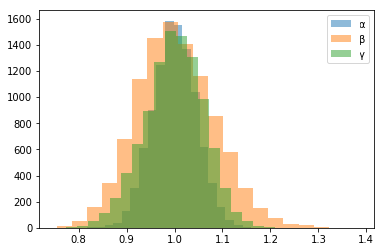

In [119]:
for i, para in enumerate(["α", "β", "γ"]):
    
    plt.hist(estIV_sim[:, i], bins=20, alpha=0.5, label=para)
    
plt.legend()

(e)

In [120]:
@njit
def two_SLS(y, x, z, x2):
    
    fs_est = OLS(x, x2, z)
    x_fitted = fs_est[0] + fs_est[1] * x2 + fs_est[2] * z
    
    est = OLS(y, x_fitted, z)
    
    return est

In [121]:
two_SLS(y, x, z, x2)

array([1.03870512, 1.14053044, 1.00544753])

In [122]:
IV(y, x, z, x2)

array([1.03870512, 1.14053044, 1.00544753])